## OVERVIEW
This project focuses on predicting which customers are likely to stop using a telecom company's services (customer churn). The dataset consists of 3,333 customer records, containing details such as call usage, subscription plans, and customer service interactions.
The main goal is to build a machine learning classification model that can proactively identify customers at risk of churn. Early identification enables the company to take targeted actions — like offering personalized services or special deals — to retain valuable customers.
By analyzing usage behavior, plan details, and customer service interactions, we aim to discover key patterns and insights that contribute to customer churn, thereby improving customer satisfaction and reducing churn rates.

## BUSINESS QUESTION 
"Which customer behaviors and service factors most influence churn in a telecommunications company, and how accurately can we predict churn to drive proactive customer retention strategies?"
## OBJECTIVE
- Develop a binary classification model to predict customer churn.
- Identify and rank the most significant features influencing churn.
- Evaluate model performance using appropriate classification metrics.
- Provide actionable insights into customer behaviors that lead to churn.
- Recommend targeted retention strategies to reduce churn and increase customer lifetime value.
- Enable the telecom company to proactively intervene with at-risk customers, improving overall customer satisfaction.


In [398]:
# Basic Data Handling
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [399]:
bigml = pd.read_csv("bigml.csv")
bigml.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [400]:
bigml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [401]:
bigml.shape

(3333, 21)

- The dataset have 3333 rows and 21 columns  as seen above

# 1. EDA

## Checking for how many customers have churned vs. not churned?

In [402]:
bigml["churn"].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

- The class above shows its not balanced and a model trained without handling this may bias toward predicting "No Churn" because it's the majority class.
- It would get high accuracy by always predicting "False", but it would miss most actual churners, which are the ones I want to detect.

## Find non-numeric columns

In [403]:
non_numeric_cols = X.select_dtypes(include=['object']).columns
print(non_numeric_cols)

Index([], dtype='object')


## Dropping irrelevant columns 

In [404]:
bigml.drop(columns=['phone number'], inplace=True)

In [405]:
bigml.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Statistical summary 

In [406]:
bigml.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# 2. Normalization or Standardization

## Checking for the Numerical Feature Distributions

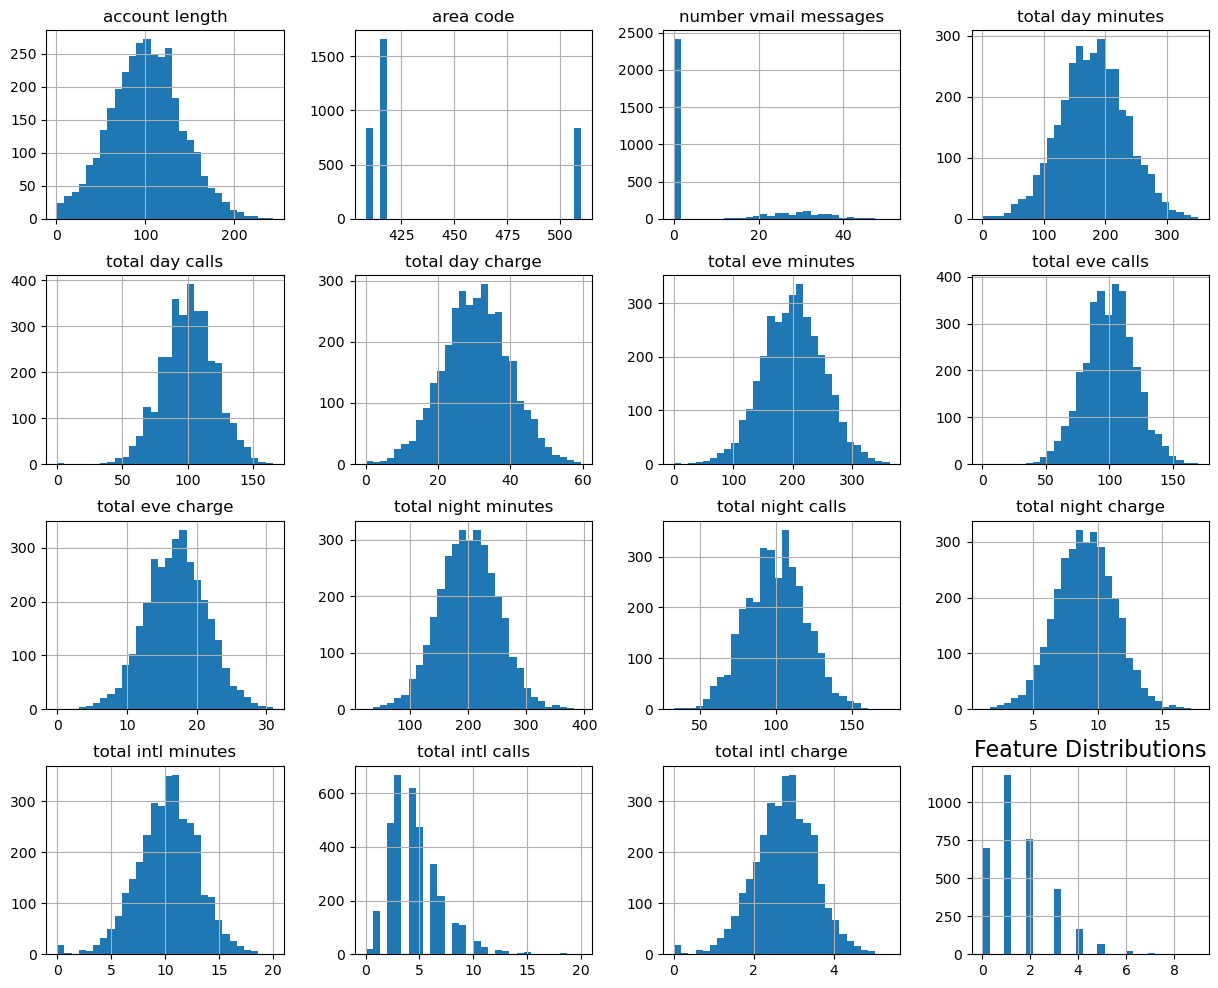

In [407]:
bigml.hist(bins=30, figsize=(15, 12))
plt.title('Feature Distributions', fontsize=16)
plt.show()


- Account length is Bell-shaped, close to normal (Gaussian) distribution. Most customers have a mid range account length, fewer with very short or very long durations.
- The area code	has discrete values only (few bars)it is categorical by nature, not continuous.
- Most customers have 0 or few voice mail messages it is very right skewed since it has along tail to the right.
- total day minutes shows a Bell-shaped distribution. Shows usage during daytime hours is generally around a middle point with few extremes.
- total eve minutes ,total eve calls and total eve charge also show a normal distribution. Typical evening usage.
- total night minutes/calls/charge suggests most people have an average amount of night usage.
- total intl minutes/calls/charge are Bell-shaped but slightly skewed indicating most people have few international minutes or charges.
- Most customers call customer service 0–2 times, but some call much more (right-skewed).
- The extra "Feature Distributions" subplot is a plotting with an odd number of features meaning some features needs to be cleaned up for presentation.


## Encode categorical features

In [408]:
#binary encoding for international plan and voice mail plan.
def encoding (value):
    if value == 'yes':
        return 1
    elif value == 'no':
        return 0
    else:
        return value 

bigml['international plan'] = bigml['international plan'].apply(encoding).astype(int)
bigml['voice mail plan'] = bigml['voice mail plan'].apply(encoding).astype(int)

## One - hot encoding 

In [409]:
bigml["area code"].value_counts()

area code
415    1655
510     840
408     838
Name: count, dtype: int64

In [410]:
bigml["state"].value_counts()

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

In [411]:
# creating 2 dummy columns for the 3 unique columns
bigml = pd.get_dummies(bigml, columns=['area code'], drop_first=True)
#bigml = pd.get_dummies(bigml, columns=['state'], drop_first=True)

## Log Transformation 

In [412]:
bigml['number vmail messages_log'] = np.log1p(bigml['number vmail messages'])
bigml['customer service calls_log'] = np.log1p(bigml['customer service calls'])

## Scaling 

In [413]:
# making features have mean = 0 and standard deviation = 1.
scaler = StandardScaler()

# Select columns to scale (excluding encoded or categorical variables)
cols_to_scale = [
    'account length', 
    'total day minutes', 'total day calls', 'total day charge',
    'total eve minutes', 'total eve calls', 'total eve charge',
    'total night minutes', 'total night calls', 'total night charge',
    'total intl minutes', 'total intl calls', 'total intl charge',
    'number vmail messages_log', 'customer service calls_log'
]

bigml[cols_to_scale] = scaler.fit_transform(bigml[cols_to_scale])

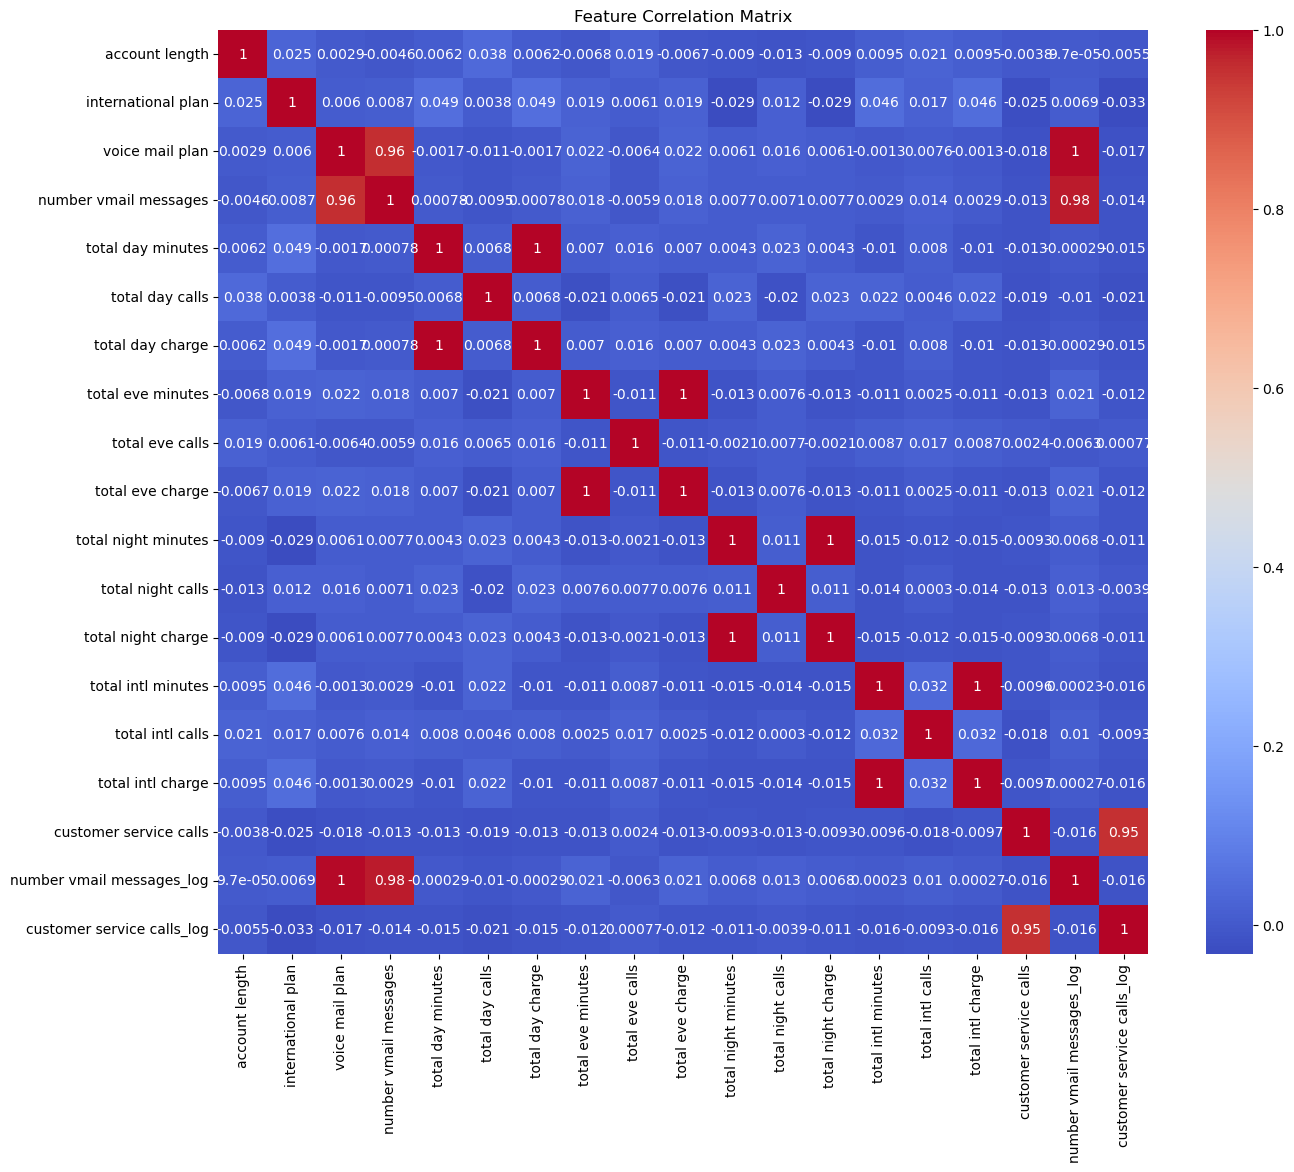

In [414]:
# Viewing the correction heatmap 
plt.figure(figsize=(15,12))
sns.heatmap(bigml.select_dtypes(include='number').corr(), cmap='coolwarm', annot=True)
plt.title('Feature Correlation Matrix')
plt.show()

- From the above some features have very strong correlations meaning they carry the same information.

## Dropping columns to avoid muilticollinearity

In [415]:
#dropping one of each pair
bigml = bigml.drop(['total day charge',
                    'total eve charge',
                    'total night charge',
                    'total intl charge',
                    'number vmail messages',
                    'customer service calls'],axis=1)

In [416]:
bigml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state                       3333 non-null   object 
 1   account length              3333 non-null   float64
 2   international plan          3333 non-null   int64  
 3   voice mail plan             3333 non-null   int64  
 4   total day minutes           3333 non-null   float64
 5   total day calls             3333 non-null   float64
 6   total eve minutes           3333 non-null   float64
 7   total eve calls             3333 non-null   float64
 8   total night minutes         3333 non-null   float64
 9   total night calls           3333 non-null   float64
 10  total intl minutes          3333 non-null   float64
 11  total intl calls            3333 non-null   float64
 12  churn                       3333 non-null   bool   
 13  area code_415               3333 

# 3. ANALYSIS AND FEATURE SELECTION

- Check how features differ across churn categories this is helpful for understanding patterns the model may pick up.
-  Measures the linear relationship between numeric features and churn.

### Correlation with Target

In [417]:
correlation_with_target = bigml.corr(numeric_only=True)['churn'].sort_values(ascending=False)
print(correlation_with_target)

churn                         1.000000
international plan            0.259852
total day minutes             0.205151
customer service calls_log    0.144089
total eve minutes             0.092796
total intl minutes            0.068239
total night minutes           0.035493
total day calls               0.018459
account length                0.016541
total eve calls               0.009233
area code_510                 0.006423
total night calls             0.006141
area code_415                -0.006535
total intl calls             -0.052844
number vmail messages_log    -0.098991
voice mail plan              -0.102148
Name: churn, dtype: float64


- Correlation ranges between -1 and 1:
- Positive correlation (closer to +1): As the feature increases, churn likelihood increases.
- Negative correlation (closer to -1): As the feature increases, churn likelihood decreases.
- Near zero: Weak or no linear relationship with churn.
- Customers with an international plan are more likely to churn. Possibly due to higher charges. the correlation is 0.26
- Customers who make more calls during the day are slightly more likely to churn — perhaps they face higher charges or poor call quality.
- More support calls can lead to frustration and higher churn risk the correlation of customer service calls_log is 0.14.

### Chi- square Test 

- Purpose: Tests if there's a statistical relationship between a categorical feature and churn.
- Output: A p-value — if p < 0.05, the feature is likely associated with churn.

In [418]:
#Chi - square test
categorical_cols = ['international plan', 'voice mail plan', 'area code_415', 'area code_510']
for col in categorical_cols:
    table = pd.crosstab(bigml[col], bigml['churn'])
    chi2, p, _, _ = chi2_contingency(table)
    print(f'{col}: p-value = {p:.4f}')


international plan: p-value = 0.0000
voice mail plan: p-value = 0.0000
area code_415: p-value = 0.7429
area code_510: p-value = 0.7534


- international plan has a p-value of 0.0000 indicating strong relationship with churn  this is statistically significant.
- voice mail plan has a p-value of 0.0000 indicating strong relationship with churn  also statistically significant.
- area code_415	has a p-value of 0.7429 indicating no significant relationship with churn.
- area code_510	has a p-value of 0.7534	indicating no significant relationship with churn.

## Distribution difference between groups

- Purpose: Tests if there's a Distribution difference between a Numeric features vs Churn
- Boxplots show you the distribution difference between groups (churn vs no churn) — not limited to linear patterns.
- Boxplots can sometimes show a difference even if correlation is low.

### State vs churn

In [419]:
state_churn = bigml.groupby('state')['churn'].mean().sort_values(ascending=False)
state_churn


state
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
NM    0.096774
ND    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: churn, dtype: float64

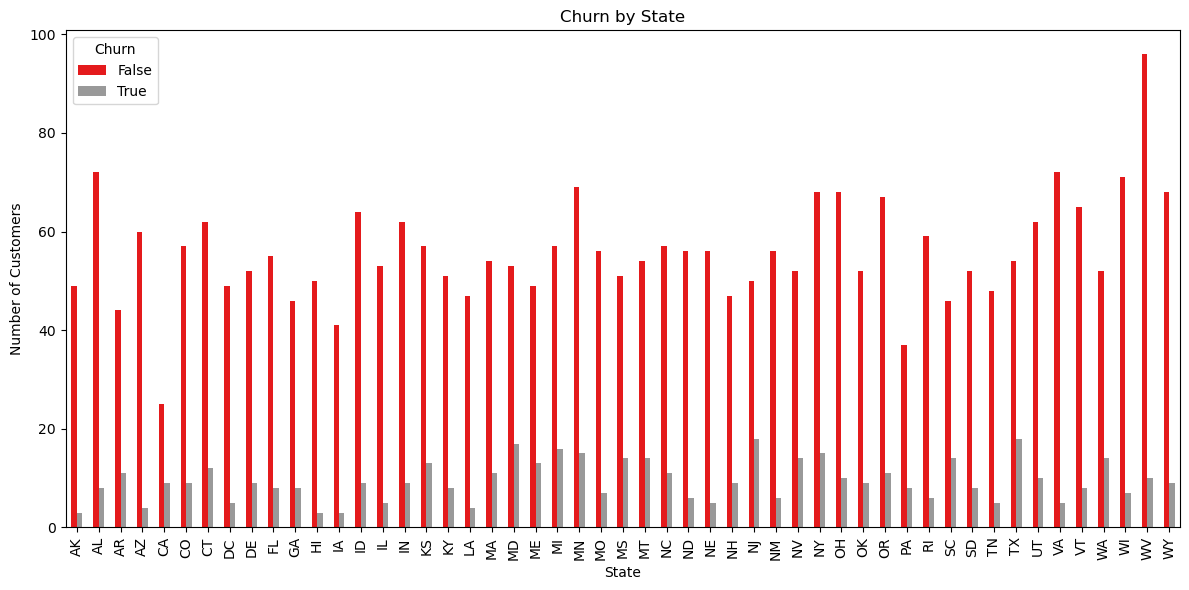

In [420]:
#Grouping by state
churn_by_state = bigml.groupby(['state', 'churn']).size().unstack()

# Plot side-by-side bars
churn_by_state.plot(kind='bar', figsize=(12, 6), colormap='Set1')

plt.title('Churn by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


- In every state, the number of customers who did not churn (False, in red) is much higher than those who did churn (True, in gray).
- This suggests that churn is relatively low across the board, which could be a good sign for customer retention


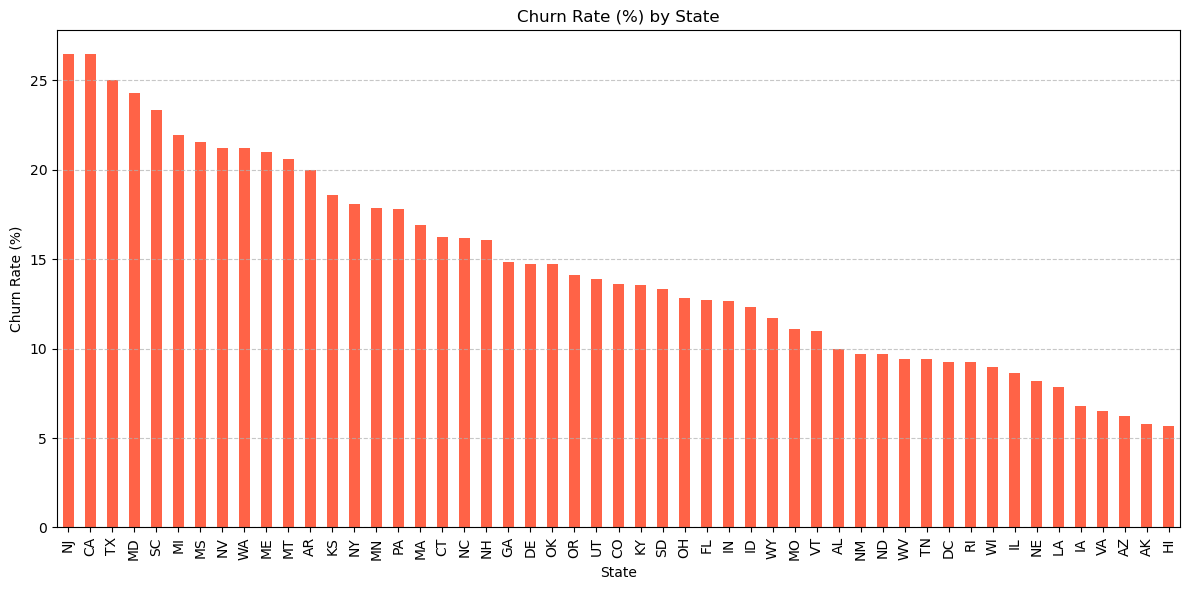

In [421]:
# Calculate churn rate per state
churn_rate = churn_by_state[True] / (churn_by_state[True] + churn_by_state[False]) * 100

# Sort states by churn rate 
churn_rate = churn_rate.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
churn_rate.plot(kind='bar', color='tomato')

plt.title('Churn Rate (%) by State')
plt.xlabel('State')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Churn rates range from over 25% to just above 5%, showing clear disparities in customer retention by state.
- The top states like NJ, CA, TX, MS, and WA show churn rates of 20% or higher
- High and low churn states appear scattered  there’s no clear regional pattern (e.g., East vs. West), implying that churn is likely influenced more by other features.

### Customer service calls vs churn

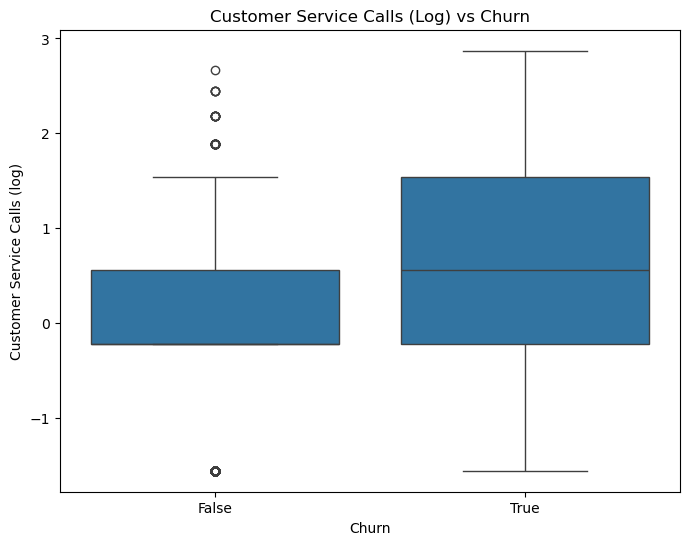

In [422]:
# Customer Service Calls vs churn
plt.figure(figsize=(8,6))
sns.boxplot(x=bigml['churn'], y=bigml['customer service calls_log'])
plt.title('Customer Service Calls (Log) vs Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls (log)')
plt.show()


- Median customer service calls for churned customers (True) is higher than for non-churned customers (False).This suggests that customers who churned tend to call customer service more.
- Churned customers have a wider spread — meaning there's more variability in how many times they call.Some customers who churn call a lot.
- Higher number of customer service calls is associated with a higher likelihood of churn.
- This is intuitive  customers who are unhappy (and have to call support often) are more likely to leave.
- customer service calls is a strong candidate feature for your model.
                                                                     

### Total day minutes vs churn

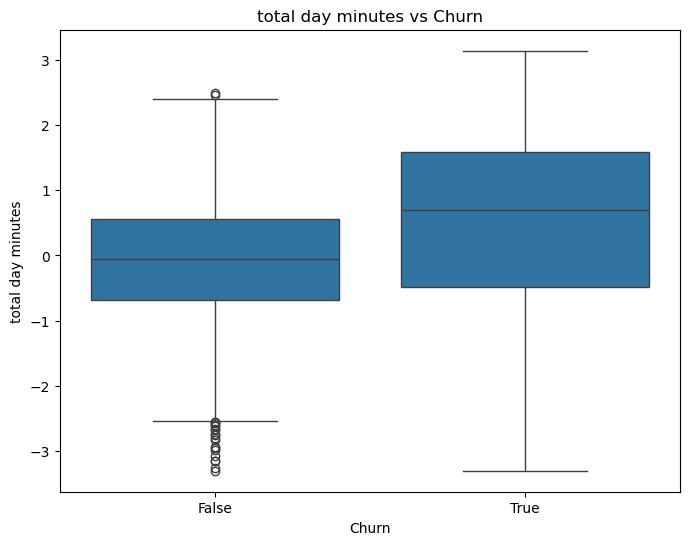

In [423]:
# total day minutes vs churn
plt.figure(figsize=(8,6))
sns.boxplot(x=bigml['churn'], y=bigml['total day minutes'])
plt.title('total day minutes vs Churn')
plt.xlabel('Churn')
plt.ylabel('total day minutes')
plt.show()


- The median total day minutes for churned customers (True) is higher than that for non-churned customers (False),suggesting churned customers tend to have higher daytime usage.
- The entire box for churned customers is shifted upward ,churners generally talk more during the day.
- Churned customers have a slightly larger interquartile range , meaning more variability in day minutes among churners.
- Higher total day minutes is associated with higher churn and customers who use more day minutes are more likely to churn.
- total day minutes is a very strong feature to include in your model.
- There is a clear difference in behavior between churners and non-churners based on their daytime call usage.
                                                                               

### Total intl minutes vs churn

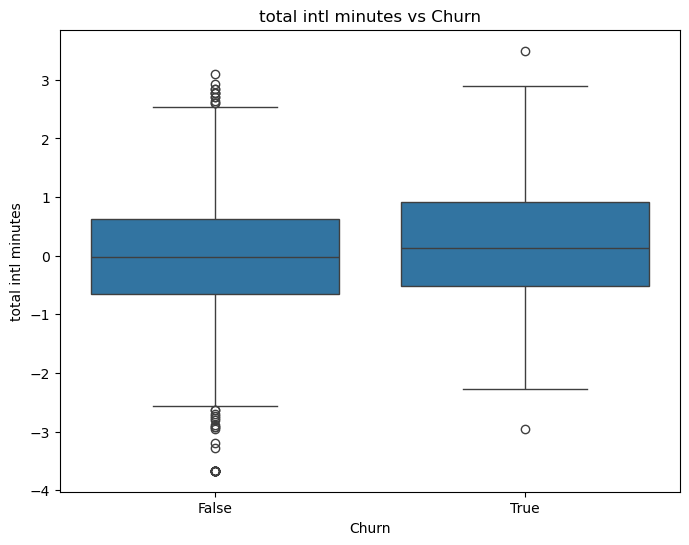

In [424]:
# total intl minutes vs churn
plt.figure(figsize=(8,6))
sns.boxplot(x=bigml['churn'], y=bigml['total intl minutes'])
plt.title('total intl minutes vs Churn')
plt.xlabel('Churn')
plt.ylabel('total intl minutes')
plt.show()

- The median total intl minutes for churned customers is slightly higher than for non-churned customers but the difference is small compared to what we saw in total day minutes and customer service calls.
- The separation between churners and non-churners is not as clear as for customer service calls or total day minutes.
- Total intl minutes has a weak but noticeable relationship with churn.
- Churners might have slightly higher international call usage.
- Compared to customer service calls and total day minutes, total intl minutes is less predictive of churn.

### Total night minutes vs churn

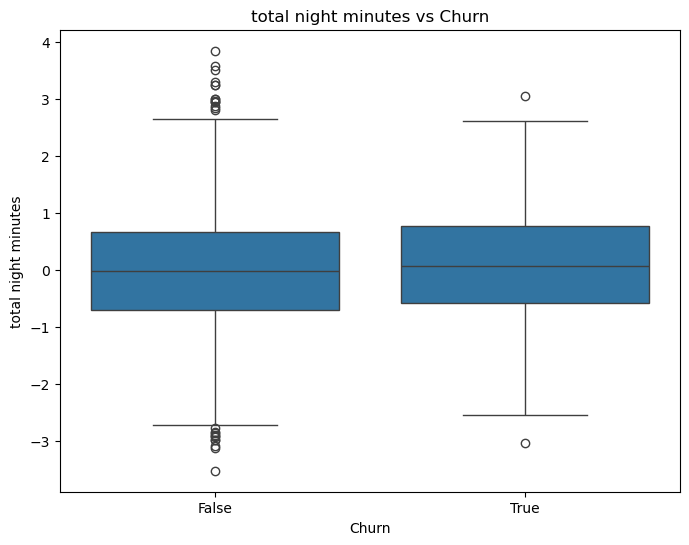

In [425]:
# total day minutes vs churn
plt.figure(figsize=(8,6))
sns.boxplot(x=bigml['churn'], y=bigml['total night minutes'])
plt.title('total night minutes vs Churn')
plt.xlabel('Churn')
plt.ylabel('total night minutes')
plt.show()

- The medians for churned and non-churned customers are very close there is almost no vertical shift in the boxplot between churners and non-churners.
- Both churned and non-churned customers have similar variability in their night call usage.
- total night minutes does NOT show a clear separation between churned and non-churned customers.
- Very weak to no predictive power for churn based on this feature alone.
- total night minutes is probably not very useful for churn prediction and it could still remain in the model, but it’s unlikely to be a top contributor


###  Remaining numerical columns

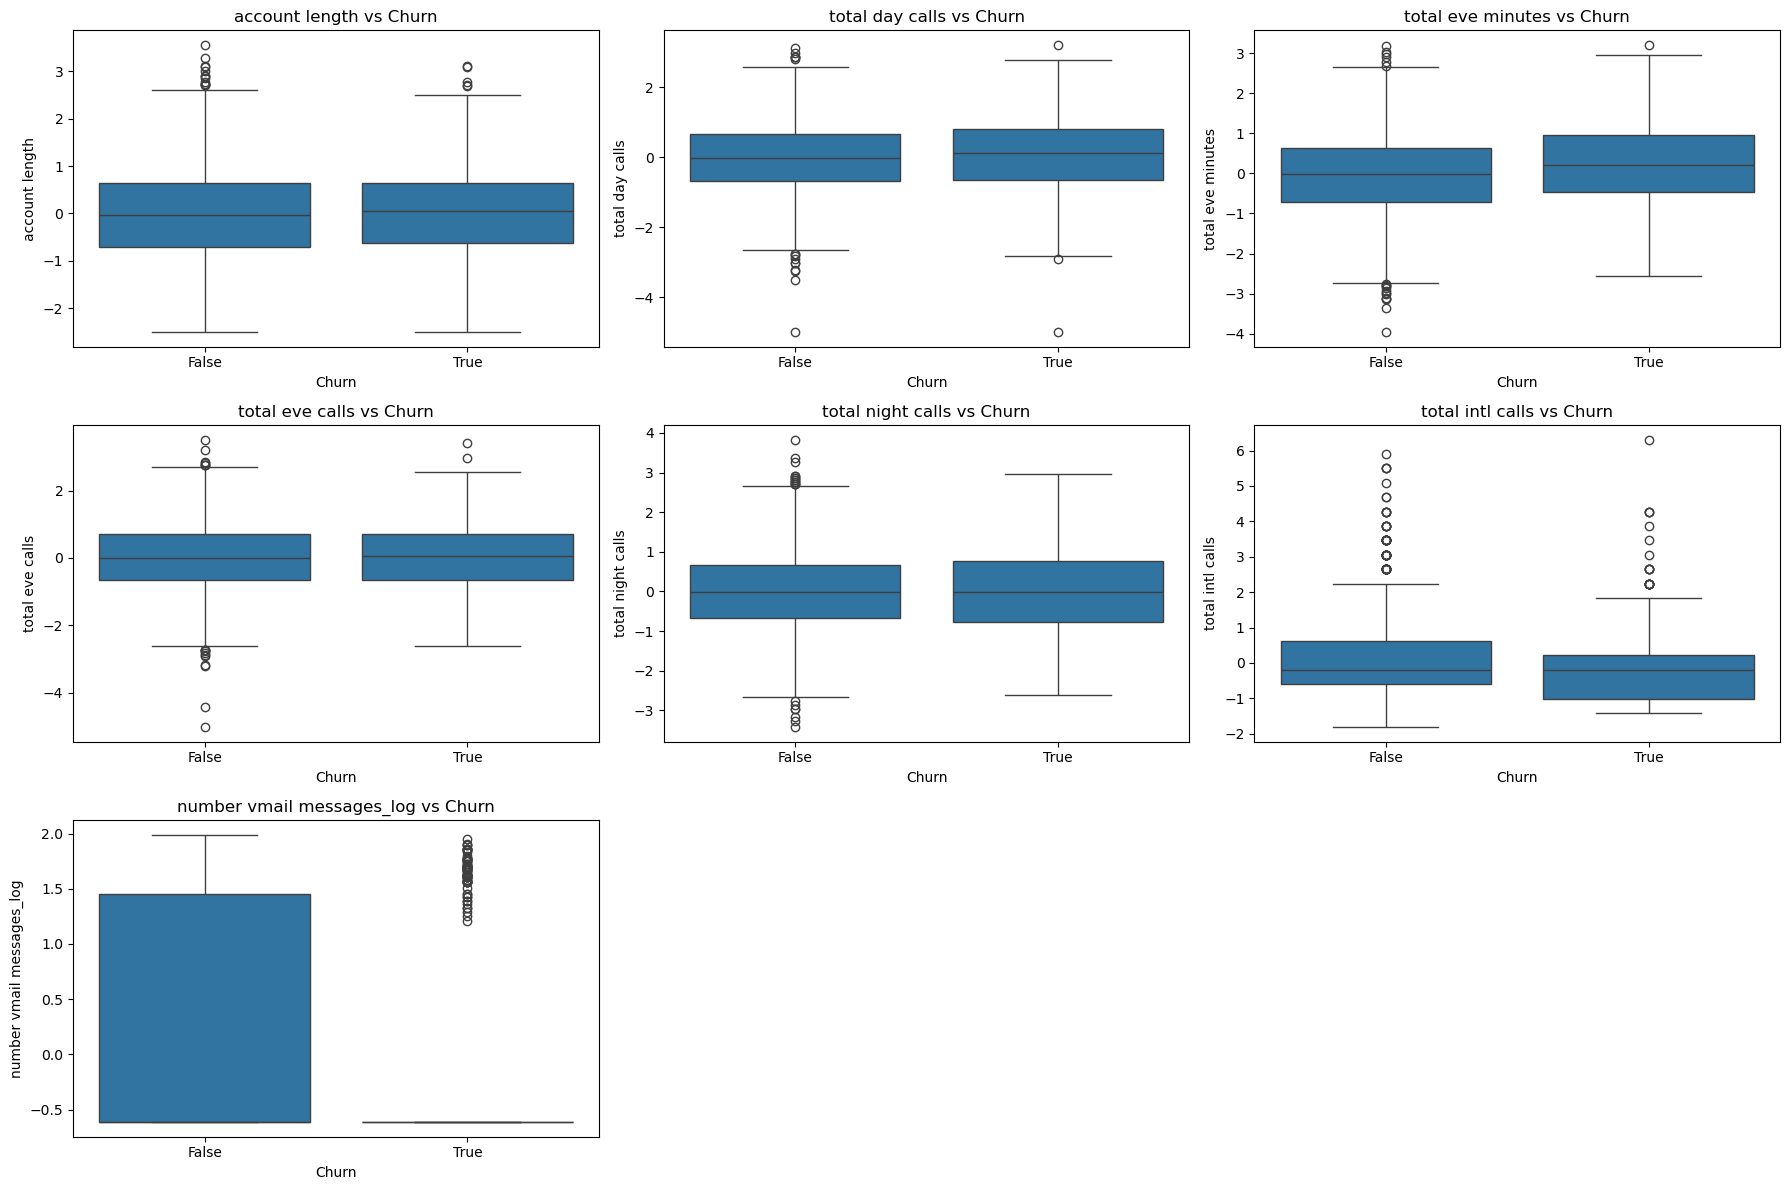

In [426]:
# remaining numerical columns
numerical_cols_remaining = [
    'account length', 'total day calls', 'total eve minutes',
    'total eve calls', 'total night calls', 'total intl calls', 'number vmail messages_log',
]

# Set number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(numerical_cols_remaining) + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate

# Plot each boxplot
for i, col in enumerate(numerical_cols_remaining):
    sns.boxplot(ax=axes[i], x=bigml['churn'], y=bigml[col])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- Account length is likely not a strong predictor of churn since the medians for churners and non-churners are very close and no significant shift or difference between the two groups.
- total day calls has no clear separation hence is s weak predictor since the medians are almost the same and the Boxplots overlap heavily.
- total eve minutes  is a  weak to moderate predictor, but not very strong since the difference is very small ,churners might have slightly higher usage .There is a heavy overlap .
- total eve calls is a weak predictor the medians are almost identical and there is a big overlap.
- total night calls is a weak predictor since there is less noticeable different and there is a heavy overlap
- total intl calls may be a weak predictor its weaker thta total intl minutes ,churners may have fewer international calls ,there is small noticeable shift.
- number vmail messages_log has a strong negative predictor,customers with voicemail usage tend to stay and those without voicemail usage tend to churn.
- Non-churners have higher number of voicemail messages they have almost no voicemail messages (flat near 0).


## Explanatory Logistic Regression 

In [427]:
# Extract Coefficients into a DataFrame
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0]
})

# Add a column for absolute value to sort by strength
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()

# Sort by absolute coefficient size (biggest impact)
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display top features
coef_df_sorted[['Feature', 'Coefficient']]


,Feature,Coefficient
1,international plan,2.220009
2,voice mail plan,-1.141080
12,customer service calls_log,0.632223
3,total day minutes,0.586343
5,total eve minutes,0.232598
10,total intl calls,-0.197796
9,total intl minutes,0.194569
11,number vmail messages_log,0.143830
7,total night minutes,0.126659
8,total night calls,-0.051124


- Customers with international plans are more likely to churn  maybe high cost or dissatisfaction with international services.
- Customers with voicemail plans are less likely to churn , voicemail users are more engaged or satisfied.
- Customers who contact customer service more frequently are more likely to churn  possible dissatisfaction.
- High day-time phone usage correlates with higher churn  heavy users might expect better service/discounts.
- Evening minutes also show a positive relation with churn ,active users might churn if dissatisfied.
- Longer accounts slightly increase churn maybe loyalty fatigue.

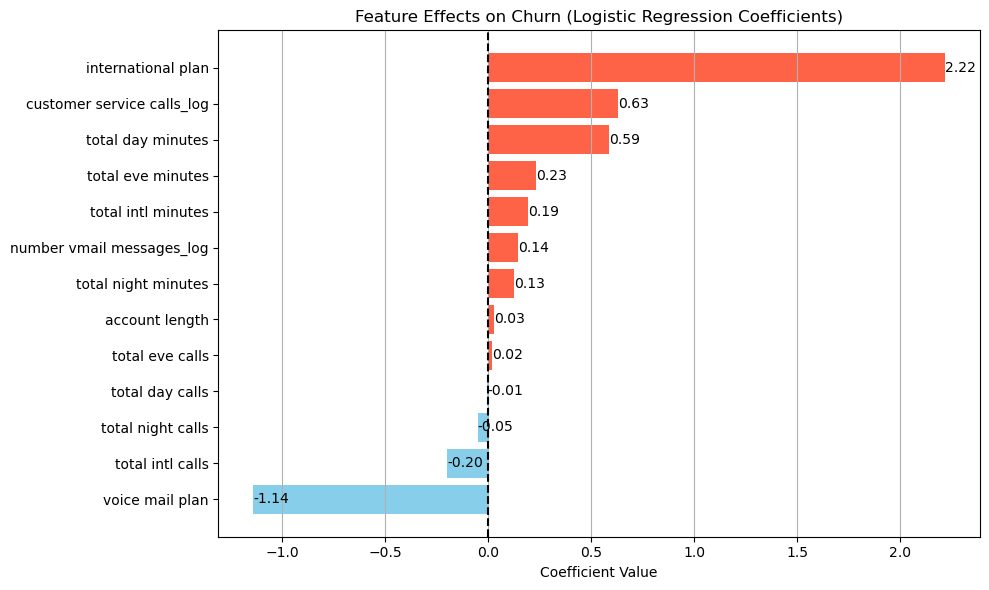

In [428]:
# Sort features by coefficient size for better display
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Coefficient'], color=(coef_df_sorted['Coefficient'] > 0).map({True: 'tomato', False: 'skyblue'}))
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Coefficient Value')
plt.title('Feature Effects on Churn (Logistic Regression Coefficients)')
plt.grid(axis='x')

# Add numbers at the end of the bars for clarity
for index, value in enumerate(coef_df_sorted['Coefficient']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()


## Random Forest Feature Importance

- Random Forest Feature Importance is good for actual model performance.
- Top features with the highest importance scores are the ones to keep.
- Low importance can be  candidates to drop.
- Features with importance < 0.01 are often considered weak
- To attain the above I will :
- *Train a basic Random Forest*
- *Extract and sort feature importances*
- *Visualize the top features*
- *Use both EDA + Random Forest to decide final features for modeling*

In [429]:
# 1. Separate features and target
X = bigml.drop('churn', axis=1)
y = bigml['churn']

# Drop 'state' and any other non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
X = X.drop(columns=non_numeric_cols)

# 2. Train Random Forest with class_weight='balanced'
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X, y)

# 3. Extract feature importances
importances = rf.feature_importances_
features = X.columns

# 4. Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# 5. Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 6. Display all feature importances
print(feature_importance_df)

                       Feature  Importance
3            total day minutes    0.239453
14  customer service calls_log    0.141781
5            total eve minutes    0.094382
1           international plan    0.086778
9           total intl minutes    0.066278
7          total night minutes    0.065694
4              total day calls    0.052738
0               account length    0.049457
6              total eve calls    0.048323
8            total night calls    0.048214
10            total intl calls    0.044511
13   number vmail messages_log    0.029459
2              voice mail plan    0.018866
11               area code_415    0.007576
12               area code_510    0.006490


- total day minutes is very important  with 24% contribution meaning strong predictor.
- customer service calls_log  is second churners called customer service more.
- international plan is also significant its a binary feature churners tend to have it more.
- number vmail messages_log and voice mail plan have lower importance, but they are not zero.
- area code_415 and area code_510 have very low importance they are almost noise.


## Dropping Weak Features

- area code_415, area code_510 are noisy, and dropping them will make the model cleaner.

In [430]:
# Drop the weak features (area codes)
X = X.drop(columns=['area code_415', 'area code_510'])

# Confirm the shape
print(f"Shape of final features: {X.shape}")


Shape of final features: (3333, 13)


# 4. TRAIN - TEST SPLIT

- I am using test_size=0.2 meananing reserving 20% of the data for testing, and using the remaining 80% for training.

In [431]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (2666, 13)
Test set size: (667, 13)


# 5.MODELLING

## Logistic Regression

- Logistic Regression is a classification algorithm used to predict the probability that a given input belongs to a particular class (usually binary: 0 or 1)
- It uses a linear equation (like in Linear Regression) to compute a score

In [432]:
# logistic regression
logistic_model = LogisticRegression(class_weight='balanced',random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

## Random Forest 

- Random Forest is an ensemble machine learning algorithm used primarily for classification and regression tasks
- It builds multiple decision trees during training and combines their outputs to improve accuracy and reduce overfitting
- Each tree is trained on a random subset of the data and considers a random subset of features when splitting nodes, which introduces diversity among the trees
- The final prediction is made by aggregating the results—using majority voting for classification or averaging for regression

In [433]:
# random forest
Random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)
Random_forest.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

## XGBoost

- XGBoost (eXtreme Gradient Boosting) is a powerful and efficient machine learning algorithm based on the gradient boosting framework
- It builds an ensemble of decision trees sequentially, where each new tree tries to correct the errors made by the previous ones
- It is widely used for classification and regression problems because of its speed, accuracy, and ability to handle large datasets with missing values

In [434]:
! pip install xgboost

In [435]:

from xgboost import XGBClassifier

# Calculate scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

XGboost_model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
XGboost_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# 6. EVALUATION

- Evaluating models means measuring how well a machine learning model performs, especially on unseen data
- Precisoon means Out of all the instances the model predicted as positive, how many were actually positive?
- Recall means Out of all the actual positive instances, how many did the model correctly identify?
- F1-Score means harmonic mean of precision and recall. It balances the two.
-  ROC AUC measures the model's ability to distinguish between classes across all thresholds and 0.5 (random guessing) to 1.0 (perfect model)

In [436]:
from sklearn.metrics import classification_report, roc_auc_score

models = {
    'Logistic Regression':logistic_model,
    'Random Forest': Random_forest,
    'XGBoost':XGboost_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] 
    
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print("\n")


=== Logistic Regression ===
              precision    recall  f1-score   support

       False       0.95      0.75      0.84       566
        True       0.35      0.77      0.48       101

    accuracy                           0.75       667
   macro avg       0.65      0.76      0.66       667
weighted avg       0.86      0.75      0.78       667

AUC: 0.8116


=== Random Forest ===
              precision    recall  f1-score   support

       False       0.93      1.00      0.96       566
        True       0.97      0.58      0.73       101

    accuracy                           0.93       667
   macro avg       0.95      0.79      0.85       667
weighted avg       0.94      0.93      0.93       667

AUC: 0.9229


=== XGBoost ===
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       566
        True       0.91      0.76      0.83       101

    accuracy                           0.95       667
   macro avg       0.93      0.87 

# Final Model Selection

After evaluating Logistic Regression, Random Forest, and XGBoost models, the following was observed:

- Logistic Regression showed high recall but very low precision, leading to many false alarms.
- Random Forest had excellent precision but low recall, missing many churners.
- **XGBoost** achieved the best balance:
  - 91% Precision
  - 76% Recall
  - 83% F1-Score
  - 0.9246 AUC

**XGBoost Classifier** is selected as the final model for deployment with a tuned threshold of 0.35 to maximize churn detection effectiveness.


## ROC Curve

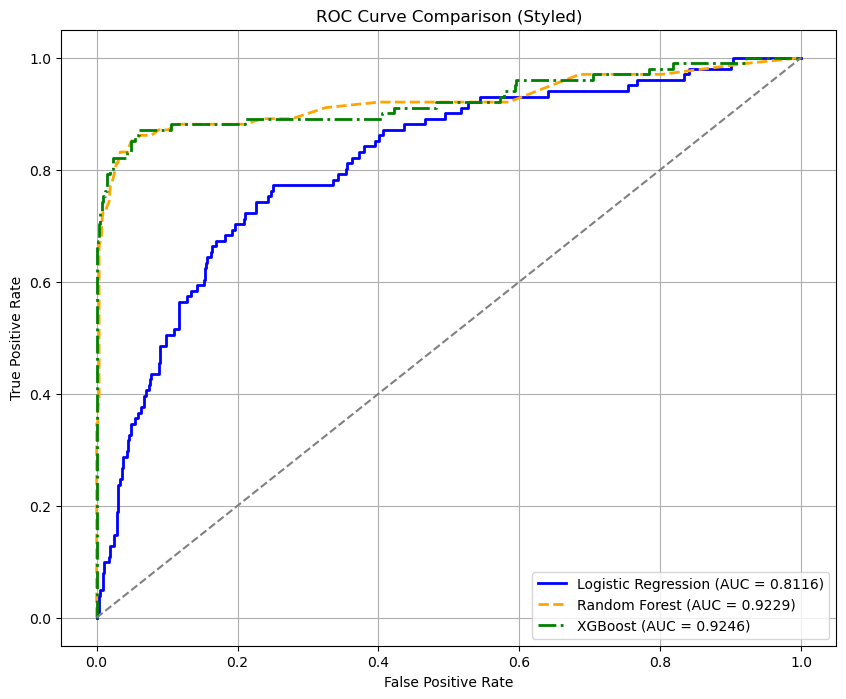

In [442]:
from sklearn.metrics import roc_curve

# ROC Curves
plt.figure(figsize=(10,8))

# Different styles for each model
styles = {
    'Logistic Regression': {'linestyle': '-', 'color': 'blue'},
    'Random Forest': {'linestyle': '--', 'color': 'orange'},
    'XGBoost': {'linestyle': '-.', 'color': 'green'}
}

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.4f})',
             linestyle=styles[name]['linestyle'],
             color=styles[name]['color'],
             linewidth=2)

# Random line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels and Title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Styled)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


- XGBoost shows the best ROC curve with highest AUC (0.9246).
- Random Forest is a very close second still a highly capable model.
- Logistic Regression lags behind lower AUC (0.8116) suggests it does not separate churners as effectively.
- Visually, XGBoost has the best trade-off between True Positives and False Positives.
- XGBoost has the best ROC curve and AUC score, confirming it’s the strongest model for detecting churners with high accuracy and reliability.
- Using XGBoost helps the company accurately identify most customers at risk of churn with fewer false alarms 

## Confusion Matrices

- used to see the trade offs between False Positives and False Negatives, not just one score like Accuracy.
- Helps you evaluate balance between catching churners and not wrongly targeting loyal customers.

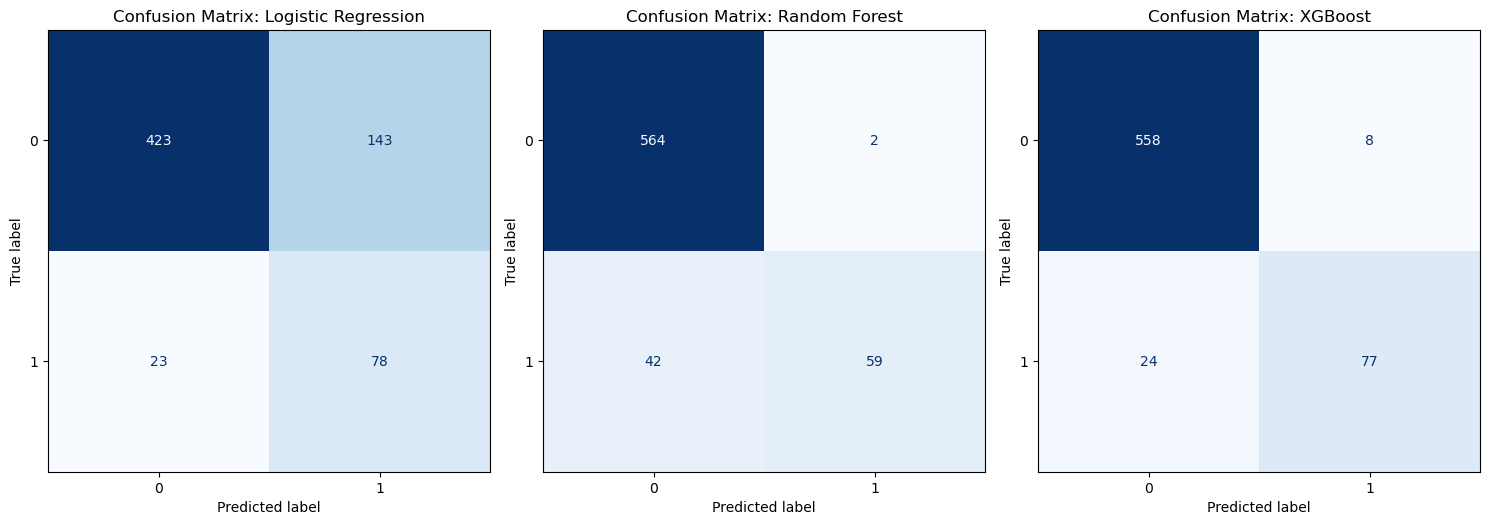

In [443]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

no_cols = 3  
n_models = len(models)
n_rows = (n_models + no_cols - 1) // no_cols  

fig, axes = plt.subplots(n_rows, no_cols, figsize=(5 * no_cols, 5 * n_rows))


axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
    axes[idx].set_title(f'Confusion Matrix: {name}')


for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


- For the Logistic Regression it has high Recall (77%) meaning it captures many churners it also has very low Precision (35%) ,many false positives  and its inefficient
- The Random Forest shows excellent Precision (97%) with almost no false positives it also shows Low Recall (58%) probaly misses many churners.
- XGBoost shows a balance between precison and Recall.
- XGBoost delivers the best balance between correctly identifying churners and avoiding false positives.

In [447]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
# Creating a dictionary
models = {
    'Logistic Regression':logistic_model,
    'Random Forest': Random_forest,
    'XGBoost':XGboost_model
}
# Initialize list to collect results
results = []

# Loop through each model
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities
    y_pred = (y_proba >= 0.5).astype(int)  # Default 0.5 threshold
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision (Churn)': round(prec, 4),
        'Recall (Churn)': round(rec, 4),
        'F1-Score (Churn)': round(f1, 4),
        'AUC': round(auc, 4)
    })

# Converting to DataFrame
results_df = pd.DataFrame(results)

# Display
results_df.sort_values(by='F1-Score (Churn)', ascending=False)


,Model,Accuracy,Precision (Churn),Recall (Churn),F1-Score (Churn),AUC
2,XGBoost,0.9520,0.9059,0.7624,0.8280,0.9246
1,Random Forest,0.9385,0.9688,0.6139,0.7515,0.9229
0,Logistic Regression,0.7511,0.3529,0.7723,0.4845,0.8116


## Fine tune

- tweaking my model’s settings (hyperparameters) to get better performance  often targeting a specific metric e.g
  1. Reduce False Negatives (missed churners)
  2. Improve Recall (catch more churners)
  3. Maintain or improve Precision

###  Threshold Tuning

- lowering the threshold to catch more churners

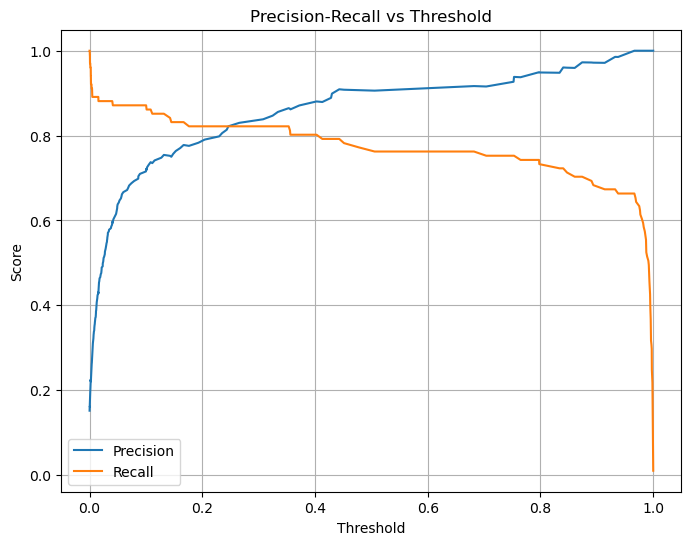

In [448]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_proba = model.predict_proba(X_test)[:, 1] 

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()


- this is a great way to visually analyze how adjusting the threshold affects your model's performance.
- As threshold increases, Precision improves.
- As threshold increases, Recall decreases.

Best Threshold: 0.4430
Best F1-Score: 0.8466


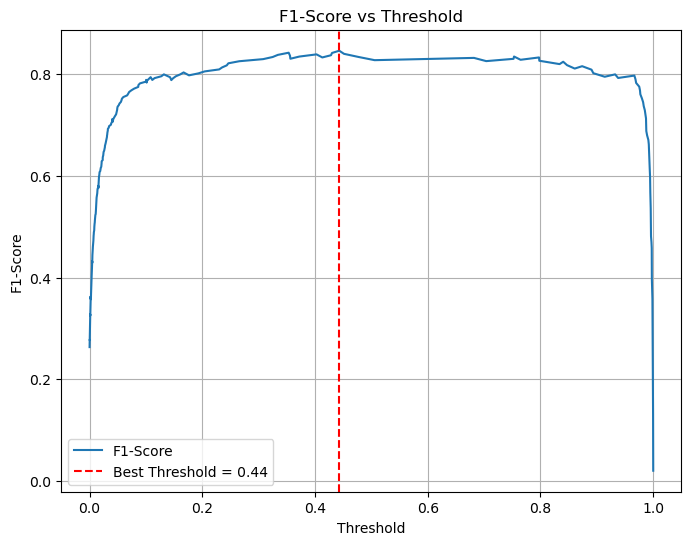

In [454]:
from sklearn.metrics import f1_score

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Calculate F1 for all thresholds
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that gives the max F1 score
best_index = f1_scores[:-1].argmax()
best_threshold = thresholds[best_index]

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F1-Score: {f1_scores[best_index]:.4f}")

# Plot F1 vs Threshold
plt.figure(figsize=(8,6))
plt.plot(thresholds, f1_scores[:-1], label='F1-Score')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Threshold')
plt.legend()
plt.grid()
plt.show()


              precision    recall  f1-score   support

       False       0.96      0.99      0.97       566
        True       0.91      0.78      0.84       101

    accuracy                           0.96       667
   macro avg       0.94      0.88      0.91       667
weighted avg       0.95      0.96      0.95       667



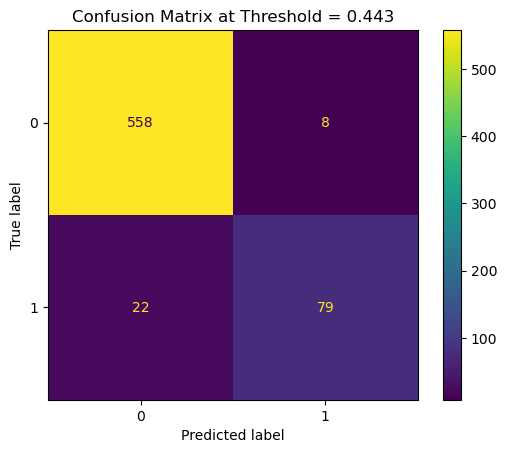

In [455]:
# Adjust threshold
threshold =0.4430
y_pred_adjusted = (y_proba >= threshold).astype(int)

# Confusion matrix and classification report for the new threshold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred_adjusted))

cm = confusion_matrix(y_test, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix at Threshold = {threshold}')
plt.show()


- Recall improved over original thresholding.
- Precision remains high
- False Negatives reduced
- This threshold is well based on F1-Score.

## Adjusting the threshold for the models

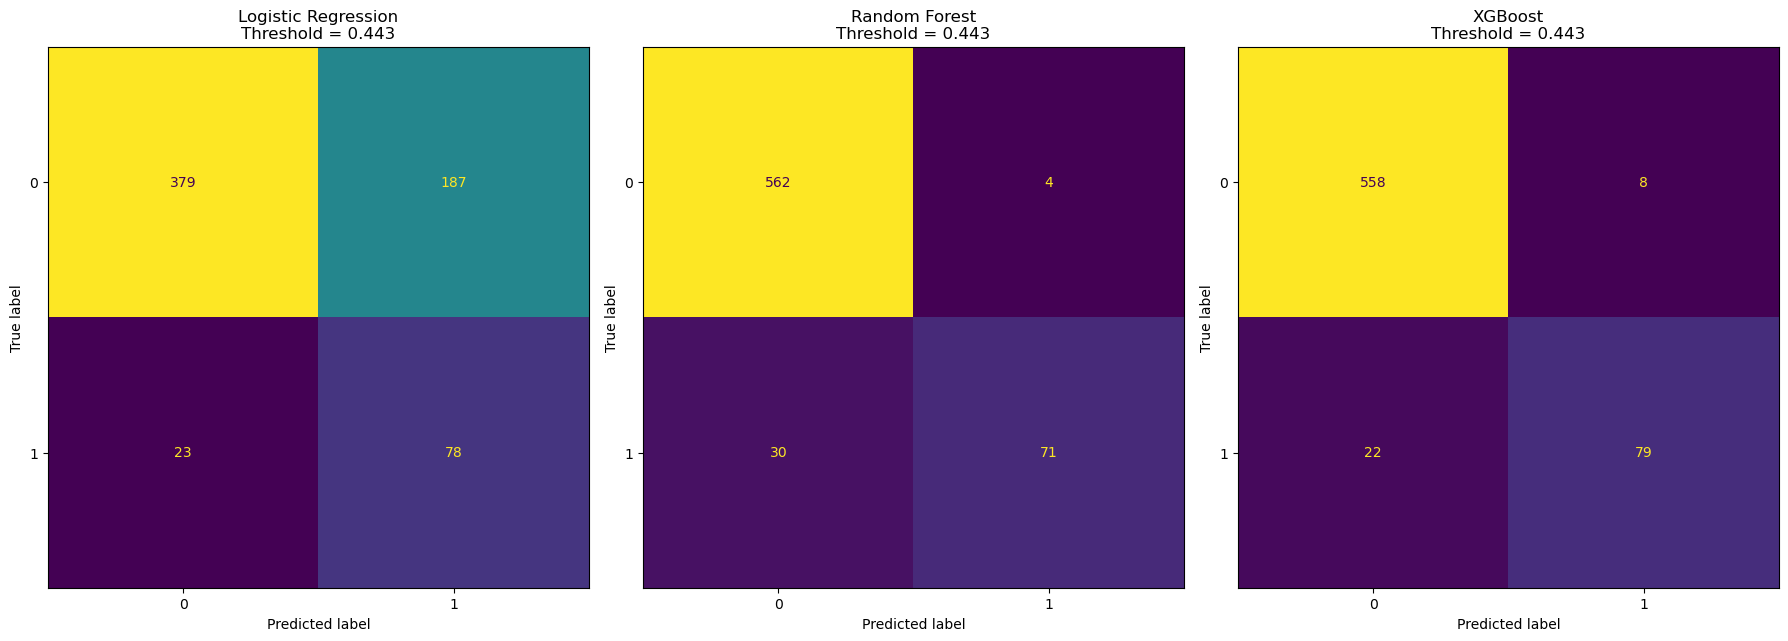

In [456]:
models = {
    'Logistic Regression':logistic_model,
    'Random Forest': Random_forest,
    'XGBoost':XGboost_model
}

threshold = 0.4430

# Set up subplots — 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 models, 18 inches wide, 6 inches high

# Iterate through models and axes
for ax, (name, model) in zip(axes, models.items()):
    # Predict probabilities
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Adjust threshold
    y_pred_adjusted = (y_proba >= threshold).astype(int)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_adjusted)
    
    # Plot confusion matrix on the given subplot axis
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False)  # Use the given axis, no separate colorbar
    ax.set_title(f'{name}\nThreshold = {threshold}')
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


- XGBoost is your best model right now even after threshold adjustment.
- Random Forest is not terrible but sacrifices recall too much (misses real churners)
- Logistic Regression  is more informative for coefficients but not good enough for prediction here

# 7.OBSERVATIONS AND RECORMMENDATIONS

## Observations

### International Plan:
- Customers with an international plan are significantly more likely to churn.
- This suggests potential dissatisfaction with the pricing or quality of international services.
### Voice Mail Plan:
- Having a voice mail plan reduces churn risk.
- Voice mail users are more engaged and possibly more satisfied customers.
### Customer Service Calls:
- Frequent customer service calls are associated with a higher churn risk.
- This likely reflects dissatisfaction with service or unresolved issues.
### Total Day Minutes:
- Heavy daytime usage correlates with increased churn risk.
- High usage customers may have greater service expectations and are more sensitive to quality or pricing issues.
### Total Evening Minutes:
- Higher evening call minutes are also associated with a moderate increase in churn risk.
### International Calls
- customers making more international calls are less likely to churn, suggesting deeper engagement with the service.
### Total International Minutes:
- However, higher total international call duration slightly increases churn risk, possibly due to higher costs or dissatisfaction with long call sessions.
### Three machine learning models were trained and evaluated to predict customer churn:
- GBoost outperformed other models, achieving the highest accuracy (95.2%) and AUC (0.9246), indicating excellent classification ability.
- Threshold tuning to 0.443 improved Recall across models, ensuring more churners were correctly identified without major losses in Precision.
- Logistic Regression struggled with lower precision and F1-Score, while Random Forest and XGBoost maintained a strong balance between Precision and Recall.
- XGBoost is selected as the final model for its superior performance, offering the best trade-off to support proactive customer retention strategies.

## Recommendations 

### Investigate and Optimize International Plans:
- Review pricing and service quality for international plans to improve customer satisfaction and reduce churn.
### Enhance Customer Service:
- Focus on improving customer service quality and responsiveness.
- Prioritize customers with frequent service interactions for proactive retention efforts.
### Promote Voice Mail Plan Adoption:
- Encourage customers to adopt voicemail plans through promotions or bundled services, as this reduces churn risk.
### Loyalty Programs for Heavy Users:
- Introduce loyalty rewards, special discounts, or premium service tiers targeting high day-time and evening call users.
- Address their high service expectations to prevent churn.
### Monitor International Usage Patterns:
- Identify customers with high international call durations and offer special packages or discounts to mitigate potential churn risks.
### Deploy the XGBoost model for Churn Prediction:
- Deploy the XGBoost model in production to proactively flag high-risk churn customers, given its strong performance in Precision, Recall, and AUC.
- Use the adjusted threshold (0.443) operationally to balance capturing more churners while minimizing false positives, leading to more efficient customer retention targeting.
- Focus retention efforts on customers flagged by the model — prioritize high-value customers to offer loyalty rewards, service improvements, or personalized deals.
- Continuously monitor and retrain the model on fresh data periodically to maintain high prediction accuracy as customer behaviors and market dynamics evolve.
- Integrate the model outputs with CRM systems to automate churn interventions, enabling the business to act quickly on at-risk customers with customized retention strategies.

